# Biogas Production Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from termcolor import colored



In [2]:
df = pd.read_csv('veri_seti_son_2.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df.head(3)

,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
0,Cargill - Sandy River Farm Digester,Farm Scale,Morrilton,Conway,Arkansas,Covered Lagoon,Operational,2008.000,Swine,0.000,0.000,0.000,4200.000,No-Info,1814400.000,0.000,Flared Full-time,No-Info,No-Info,4482.755,No-Info,15.000,4200.000,432.000,298.850,0.000,21000.000,86.400,0.000
1,Butterfield RNG Digester,Farm Scale,Buckeye,Maricopa,Arizona,Mixed Plug Flow,Operational,2022.000,Dairy,0.000,11760.000,0.000,0.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,11760.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Caballero Dairy Farms Digester,Farm Scale,Eloy,Pinal,Arizona,Unknown or Unspecified,Construction,2022.000,Dairy,0.000,8800.000,0.000,0.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,8800.000,10.739,98999.890,29.768,299200.000,0.316,9.402


In [4]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def print_heads_and_tails(dataframe, head = 5):
    display(dataframe.head(head).style.set_caption('Heads'))
    display(dataframe.tail(head).style.set_caption('Tails'))

def display_na(dataframe):
    na_df = df.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA Values']
    display(na_df.style.set_caption('Number of Na Values'))


def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1])
    display(quantiles_df.style.format("{:.2f}").set_caption('Quantiles'))

def check_df(dataframe, head = 5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Info')
    print(dataframe.info())
    print_section_title('Head and Tail')
    print_heads_and_tails(dataframe, head)
    print_section_title('Na Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)



In [5]:
check_df(df)

Shape
(491, 29)
Types
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Project Name                            491 non-null    object 
 1   Project Type                            491 non-null    object 
 2   City                                    491 non-null    object 
 3   County                                  491 non-null    object 
 4   State                                   491 non-null    object 
 5   Digester Type                           491 non-null    object 
 6   Status                                  491 non-null    object 
 7   Year Operational                        491 non-null    float64
 8   Animal/Farm Type(s)                     491 non-null    object 
 9   Cattle                                  491 non-null    float64
 10  Dairy                              

,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
0,Cargill - Sandy River Farm Digester,Farm Scale,Morrilton,Conway,Arkansas,Covered Lagoon,Operational,2008.000000,Swine,0.000000,0.000000,0.000000,4200.000000,No-Info,1814400.000000,0.000000,Flared Full-time,No-Info,No-Info,4482.755303,No-Info,15.000000,4200.000000,432.000000,298.850354,0.000000,21000.000000,86.400000,0.000000
1,Butterfield RNG Digester,Farm Scale,Buckeye,Maricopa,Arizona,Mixed Plug Flow,Operational,2022.000000,Dairy,0.000000,11760.000000,0.000000,0.000000,No-Info,109486.000000,389698.200000,Pipeline Gas,No-Info,Yes,14030.128975,Yes,1.000000,11760.000000,9.310034,14030.128975,3.559343,399840.000000,0.273825,0.974635
2,Caballero Dairy Farms Digester,Farm Scale,Eloy,Pinal,Arizona,Unknown or Unspecified,Construction,2022.000000,Dairy,0.000000,8800.000000,0.000000,0.000000,No-Info,94500.000000,2813080.400000,Pipeline Gas,No-Info,No-Info,98999.890159,No-Info,1.000000,8800.000000,10.738636,98999.890159,29.768047,299200.000000,0.315842,9.402007
3,Green Gas Partners Stanfield Digester,Centralized/Regional,Maricopa,Pinal,Arizona,Complete Mix,Operational,2018.000000,Dairy,0.000000,30000.000000,0.000000,0.000000,No-Info,3454500.000000,2760336.000000,Pipeline Gas,No-Info,Yes,337499.625540,No-Info,5.000000,30000.000000,115.150000,67499.925108,0.799055,1020000.000000,3.386765,2.706212
4,Paloma Dairy Digester,Farm Scale,Gila Bend,Maricopa,Arizona,Complete Mix,Operational,2021.000000,Dairy,0.000000,10000.000000,0.000000,0.000000,No-Info,852545.200000,0.000000,CNG,No-Info,Yes,100569.493399,No-Info,2.000000,10000.000000,85.254520,50284.746699,0.000000,340000.000000,2.507486,0.000000


,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
486,Quantum Dairy Digester,Farm Scale,Weyauwega,Waupaca,Wisconsin,Mixed Plug Flow,Shut down,2005.000000,Dairy,0.000000,1200.000000,0.000000,0.000000,No-Info,356020.000000,3350700.000000,Cogeneration,No-Info,Yes,45346.436601,Yes,18.000000,1200.000000,296.683333,2519.246478,9.411550,40800.000000,8.725980,82.125000
487,Stencil Farm Digester,Farm Scale,Denmark,Brown,Wisconsin,Horizontal Plug Flow,Shut down,2002.000000,Dairy,0.000000,1000.000000,0.000000,0.000000,No-Info,310865.600000,946080.000000,Electricity,No-Info,Yes,50391.122119,No-Info,21.000000,1000.000000,310.865600,2399.577244,3.043373,34000.000000,9.143106,27.825882
488,Tinedale Farms Digester,Farm Scale,Wrightstown,Jackson,Wisconsin,Fixed Film/Attached Media,Shut down,1999.000000,Dairy,0.000000,1800.000000,0.000000,0.000000,No-Info,200000.000000,5584500.000000,Electricity; Boiler/Furnace fuel,No-Info,No-Info,46163.455081,No-Info,24.000000,1800.000000,111.111111,1923.477295,27.922500,61200.000000,3.267974,91.250000
489,USEMCO - Peters Farm Digester,Farm Scale,Chaseburg,Vernon,Wisconsin,Complete Mix,Shut down,2011.000000,Dairy,0.000000,200.000000,0.000000,0.000000,Yes,23000.000000,3206160.000000,Electricity,No-Info,Yes,91464.824612,No-Info,12.000000,200.000000,115.000000,7622.068718,139.398261,6800.000000,3.382353,471.494118
490,Wyoming Premium Farms 2 Digester,Farm Scale,Wheatland,Platte,Wyoming,Complete Mix,Shut down,2004.000000,Swine,0.000000,0.000000,0.000000,18000.000000,No-Info,445540.000000,1340280.000000,Electricity,No-Info,No-Info,30798.542361,No-Info,19.000000,18000.000000,24.752222,1620.975914,3.008215,90000.000000,4.950444,14.892000


Na Values


,Column,Number of NA Values
0,Project Name,0
1,Project Type,0
2,City,0
3,County,0
4,State,0
5,Digester Type,0
6,Status,0
7,Year Operational,0
8,Animal/Farm Type(s),0
9,Cattle,0


Quantiles


,Year Operational,Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Total Emission Reductions (MTCO2e/yr),Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
count,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00
mean,2012.57,183.52,3543.31,6087.58,2969.49,443918.46,2218724.16,38377.98,10.49,12783.90,527.76,9914.18,10.06,139538.21,51.69,40.77
std,8.77,2237.16,4984.93,61662.90,17713.66,414336.11,4487113.72,45532.72,8.69,63625.76,4241.48,18366.55,19.01,195557.63,819.43,93.33
min,1972.00,0.00,0.00,0.00,0.00,5000.00,0.00,4.22,0.00,10.00,0.39,0.00,0.00,50.00,0.04,0.00
0%,1972.00,0.00,0.00,0.00,0.00,5000.00,0.00,4.22,0.00,10.00,0.39,0.00,0.00,50.00,0.04,0.00
5%,1998.00,0.00,0.00,0.00,0.00,33692.50,0.00,2018.51,0.00,350.00,4.05,0.00,0.00,8500.00,0.53,0.00
50%,2012.00,0.00,2000.00,0.00,0.00,344690.00,756437.80,24094.43,11.00,3157.00,75.63,1695.22,4.00,76500.00,2.69,18.02
95%,2023.00,0.00,10375.00,0.00,9696.00,1017422.60,8216981.40,103921.22,25.00,34000.00,1445.03,57594.20,40.08,403920.00,57.57,141.57
99%,2025.00,2700.00,30250.00,132000.00,80050.00,1817830.00,16276400.00,255068.93,41.00,166000.00,5324.62,84177.47,97.79,1106700.00,199.09,382.19
100%,2025.00,40000.00,39000.00,1200000.00,239200.00,3454500.00,70364700.00,390000.01,51.00,1200000.00,90654.52,130000.00,174.27,2126000.00,18130.90,1150.82


In [6]:
# let's drop columns that we do not need. We focus only on Dairy cattle
columns_to_drop = ["Project Name", "City", "County", "State", 'Cattle', 'Poultry', 'Swine', 'Total_Animals']

df.drop(columns_to_drop, axis =1, inplace=True)


In [7]:
# drop rows where dairy is 0
df = df[df['Dairy'] != 0]

In [8]:
df.shape

(420, 21)

In [9]:
df.head()

,Project Type,Digester Type,Status,Year Operational,Animal/Farm Type(s),Dairy,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
1,Farm Scale,Mixed Plug Flow,Operational,2022.000,Dairy,11760.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Farm Scale,Unknown or Unspecified,Construction,2022.000,Dairy,8800.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,10.739,98999.890,29.768,299200.000,0.316,9.402
3,Centralized/Regional,Complete Mix,Operational,2018.000,Dairy,30000.000,No-Info,3454500.000,2760336.000,Pipeline Gas,No-Info,Yes,337499.626,No-Info,5.000,115.150,67499.925,0.799,1020000.000,3.387,2.706
4,Farm Scale,Complete Mix,Operational,2021.000,Dairy,10000.000,No-Info,852545.200,0.000,CNG,No-Info,Yes,100569.493,No-Info,2.000,85.255,50284.747,0.000,340000.000,2.507,0.000
5,Farm Scale,Covered Lagoon,Operational,2011.000,Dairy,15000.000,No-Info,663685.200,5256000.000,Electricity,Yes,Yes,154991.550,No-Info,12.000,44.246,12915.962,7.919,510000.000,1.301,10.306


In [10]:

def grab_col_names(dataframe, cat_th = 10, car_th =20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] # categorical columns
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] # numerical categorical
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"] # continuous but in categ
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat


In [11]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 420
Variables: 21
cat_cols: 9
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [12]:
# lets outline categorical columns
cat_cols

['Project Type',
 'Digester Type',
 'Status',
 'Animal/Farm Type(s)',
 'Co-Digestion',
 'Biogas End Use(s)',
 'LCFS Pathway?',
 'Receiving Utility',
 'Awarded USDA Funding?']

In [13]:
num_cols

['Year Operational',
 'Dairy',
 'Biogas Generation Estimate (cu-ft/day)',
 'Electricity Generated (kWh/yr)',
 'Total Emission Reductions (MTCO2e/yr)',
 'Operational Years',
 'Biogas_per_Animal (cu-ft/day)',
 'Emission_Reduction_per_Year',
 'Electricity_to_Biogas_Ratio',
 'Total_Waste_kg/day',
 'Waste_Efficiency',
 'Electricity_Efficiency']

In [14]:
import matplotlib.pyplot as plt

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    print('#################################################')
    if plot:
        plt.figure(figsize = (20, 8))
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.xticks(rotation = 90)
        plt.show(block = True)




                        Project Type  Ratio
Project Type                               
Farm Scale                       385 91.667
Multiple Farm/Facility            15  3.571
Centralized/Regional              14  3.333
Research                           6  1.429
#################################################


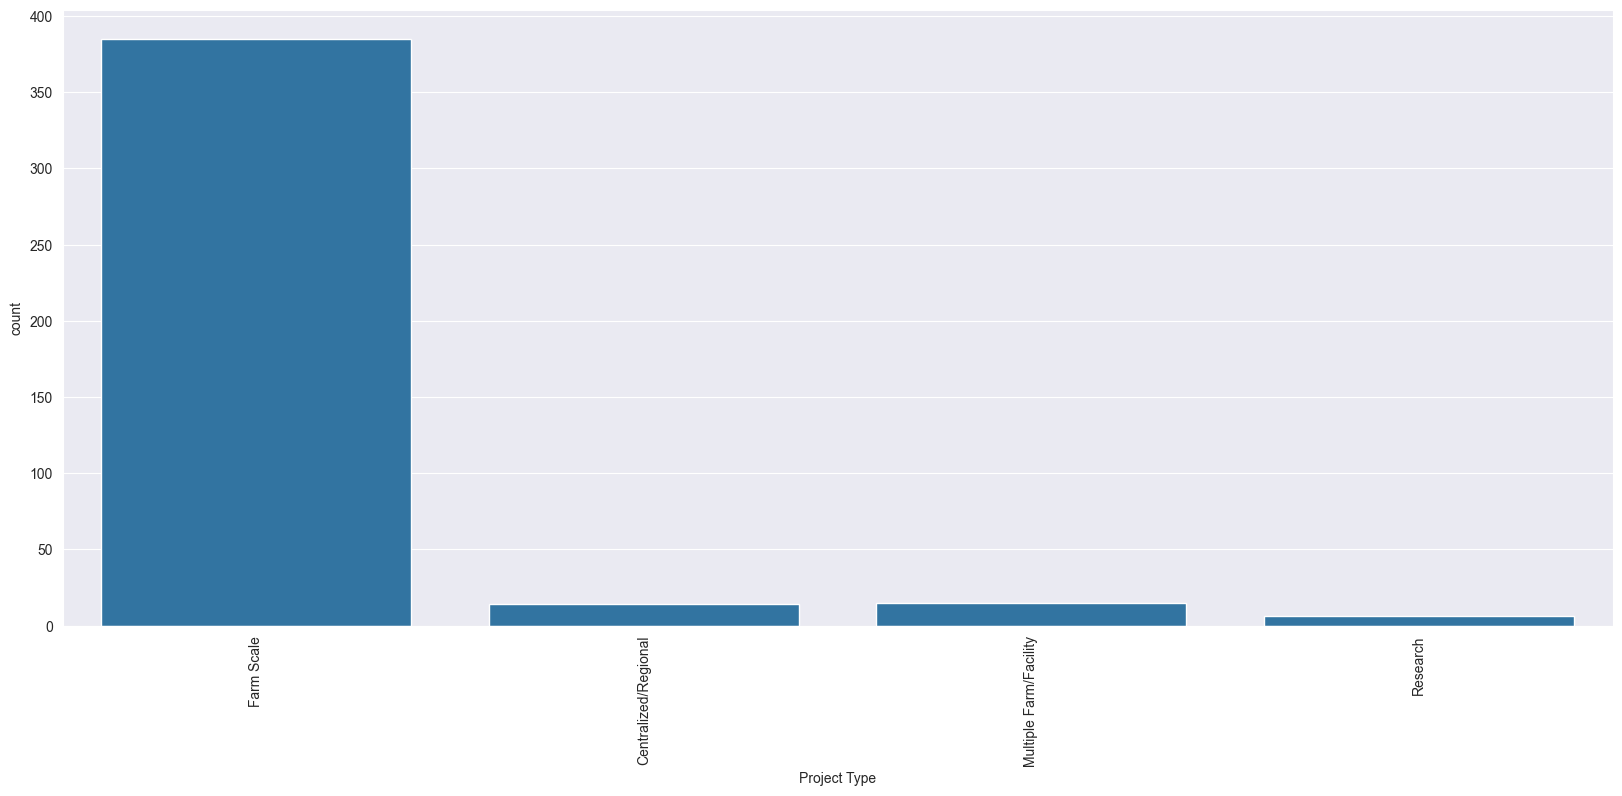

                                    Digester Type  Ratio
Digester Type                                           
Covered Lagoon                                146 34.762
Mixed Plug Flow                               109 25.952
Complete Mix                                  102 24.286
Horizontal Plug Flow                           32  7.619
Unknown or Unspecified                          8  1.905
Fixed Film/Attached Media                       6  1.429
Induced Blanket Reactor                         5  1.190
Anaerobic Sequencing Batch Reactor              3  0.714
Plug Flow - Unspecified                         3  0.714
Modular Plug Flow                               2  0.476
Vertical Plug Flow                              2  0.476
No-Info                                         1  0.238
Complete Mix Mini Digester                      1  0.238
#################################################


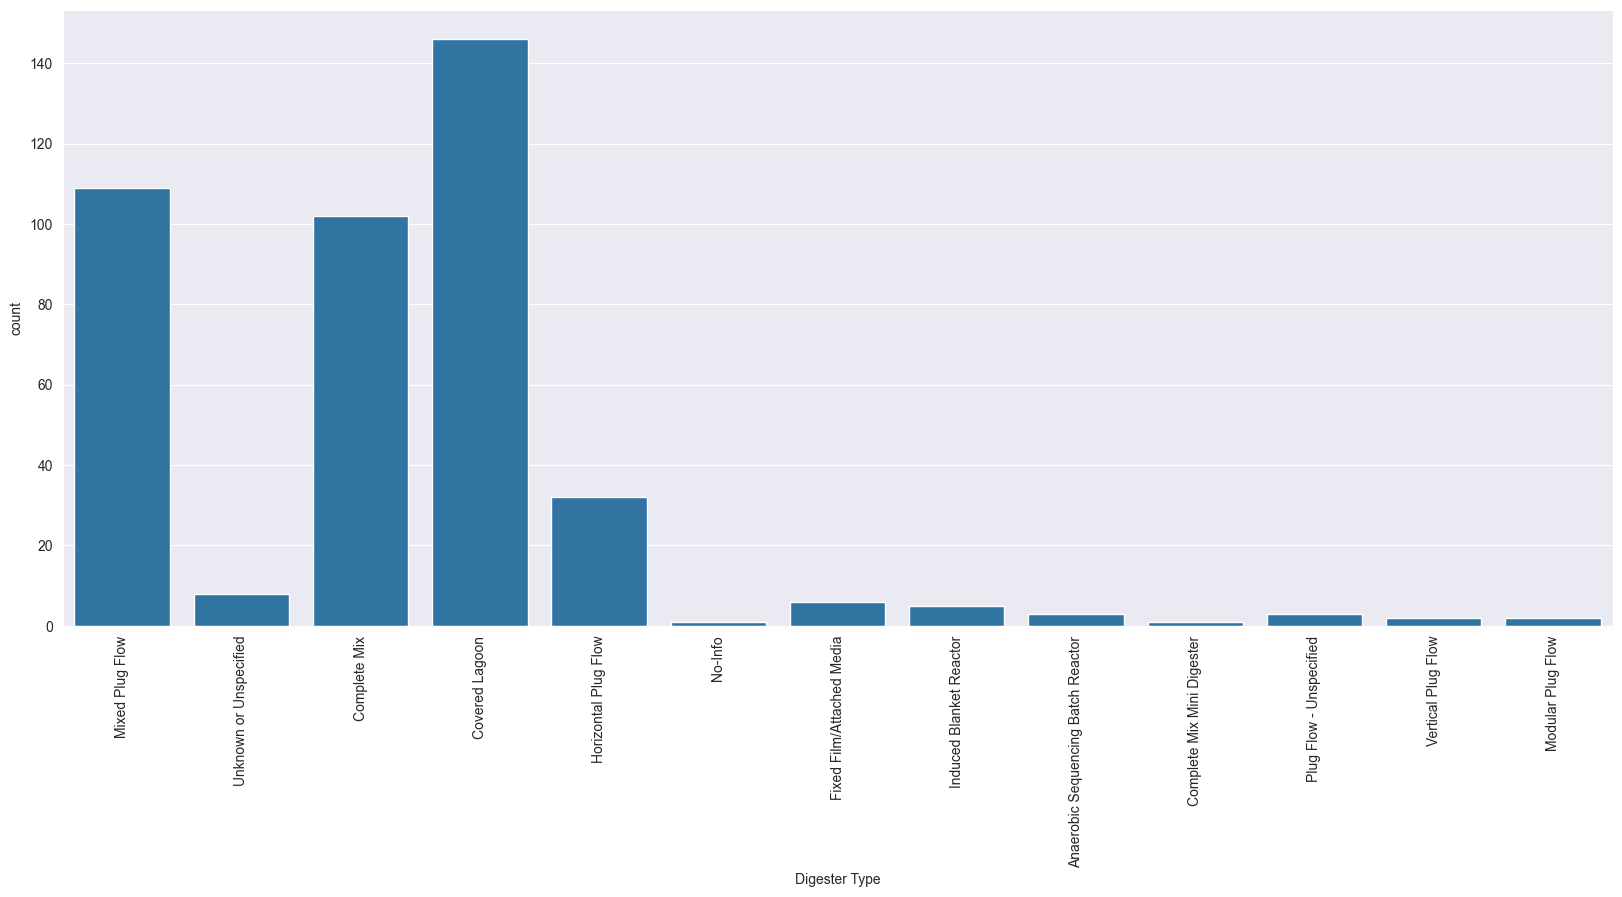

              Status  Ratio
Status                     
Operational      276 65.714
Construction      78 18.571
Shut down         66 15.714
#################################################


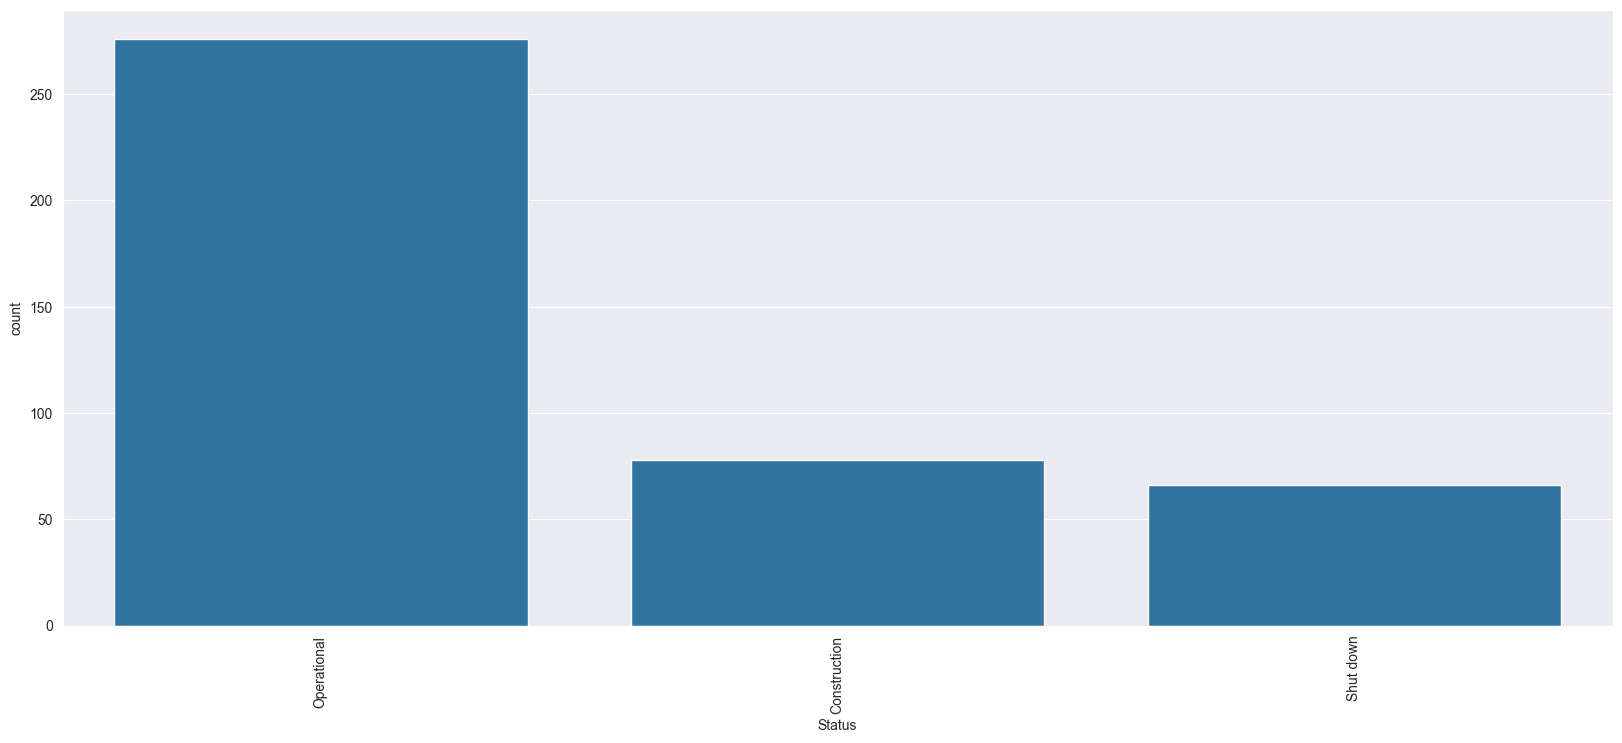

                       Animal/Farm Type(s)  Ratio
Animal/Farm Type(s)                              
Dairy                                  414 98.571
Dairy; Swine                             3  0.714
Cattle; Dairy                            2  0.476
Dairy; Poultry; Swine                    1  0.238
#################################################


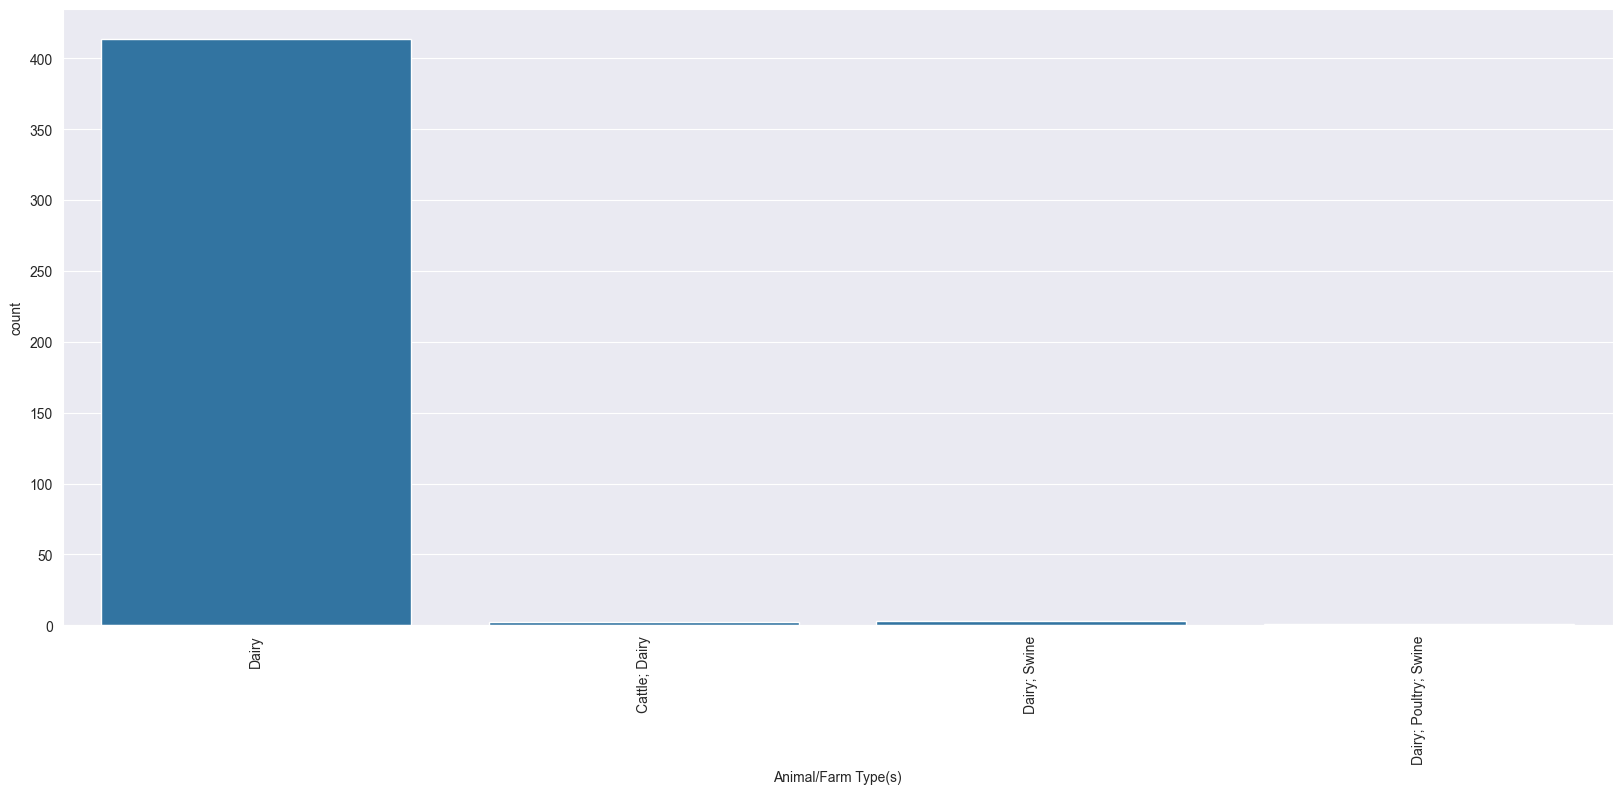

              Co-Digestion  Ratio
Co-Digestion                     
No-Info                311 74.048
Yes                    109 25.952
#################################################


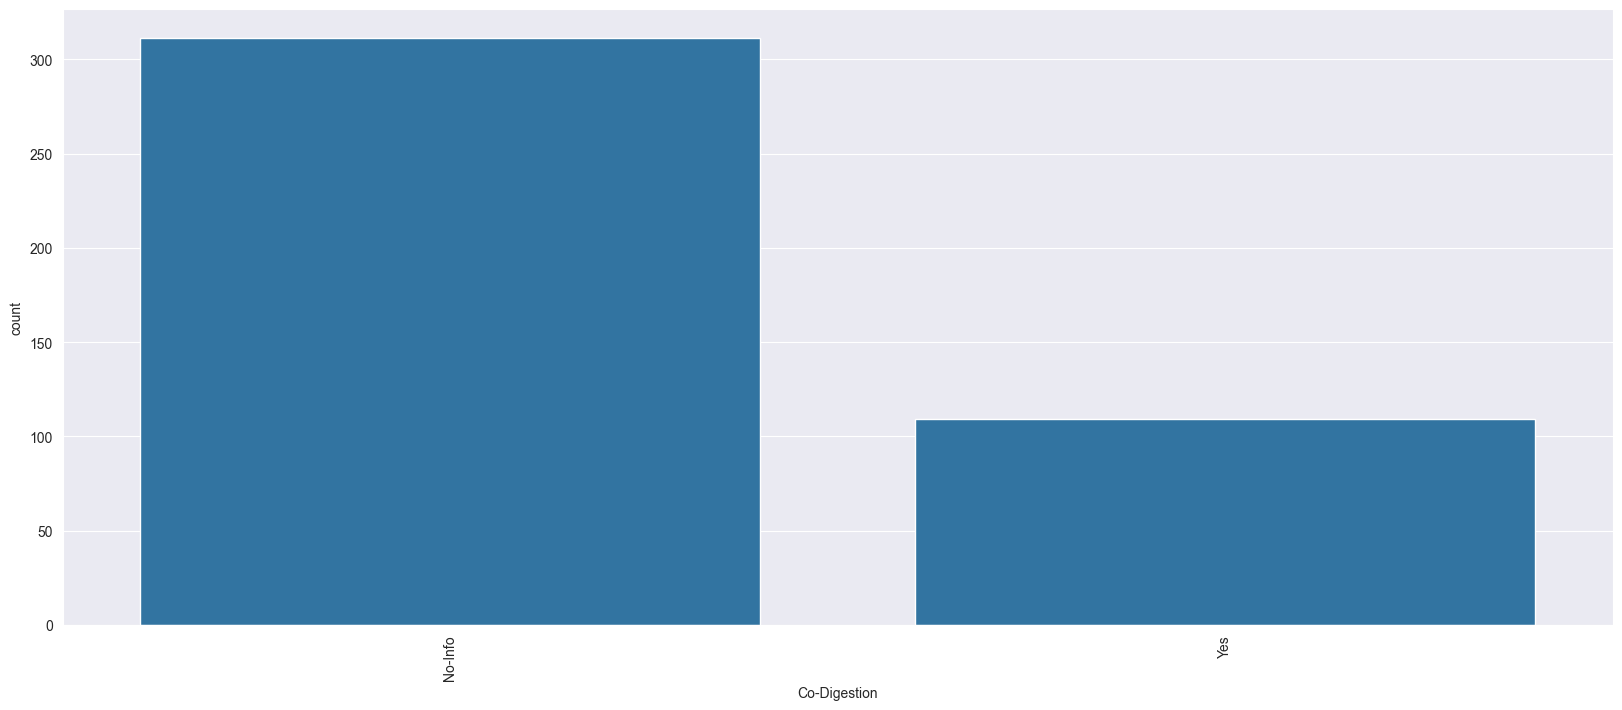

                                                Biogas End Use(s)  Ratio
Biogas End Use(s)                                                       
CNG                                                           113 26.905
Cogeneration                                                  102 24.286
Electricity                                                    84 20.000
Pipeline Gas                                                   58 13.810
Flared Full-time                                               11  2.619
Boiler/Furnace fuel                                            10  2.381
Electricity; Cogeneration                                       7  1.667
Electricity; Boiler/Furnace fuel                                7  1.667
No-Info                                                         5  1.190
Cogeneration; Boiler/Furnace fuel                               5  1.190
Electricity; Pipeline Gas                                       4  0.952
Electricity; CNG                                   

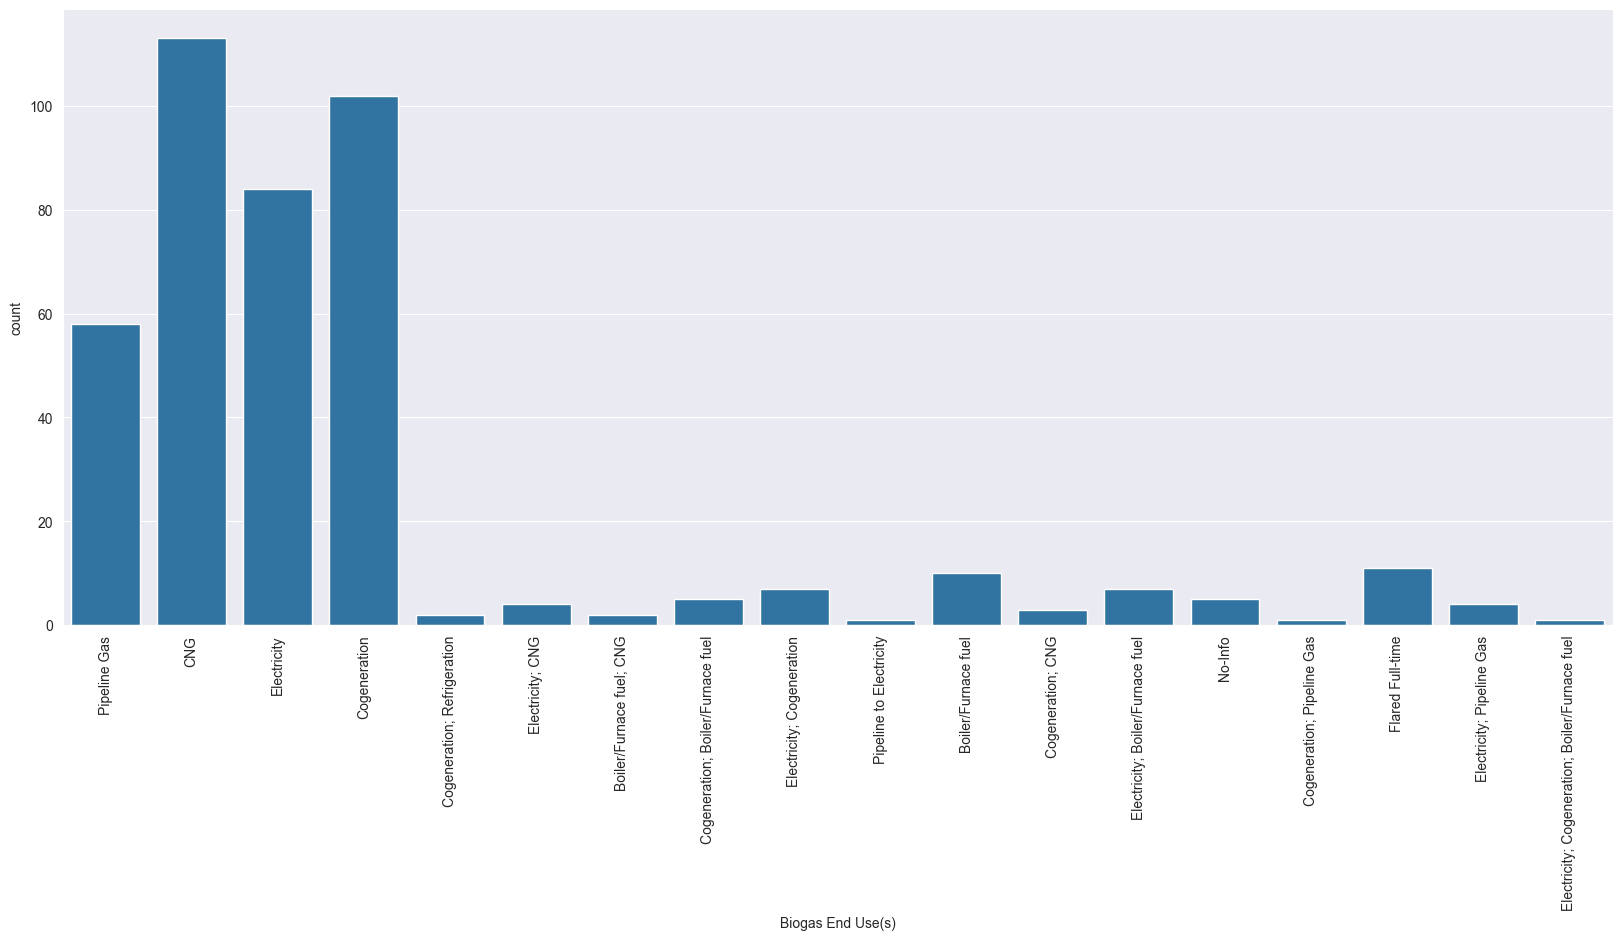

               LCFS Pathway?  Ratio
LCFS Pathway?                      
No-Info                  344 81.905
Yes                       76 18.095
#################################################


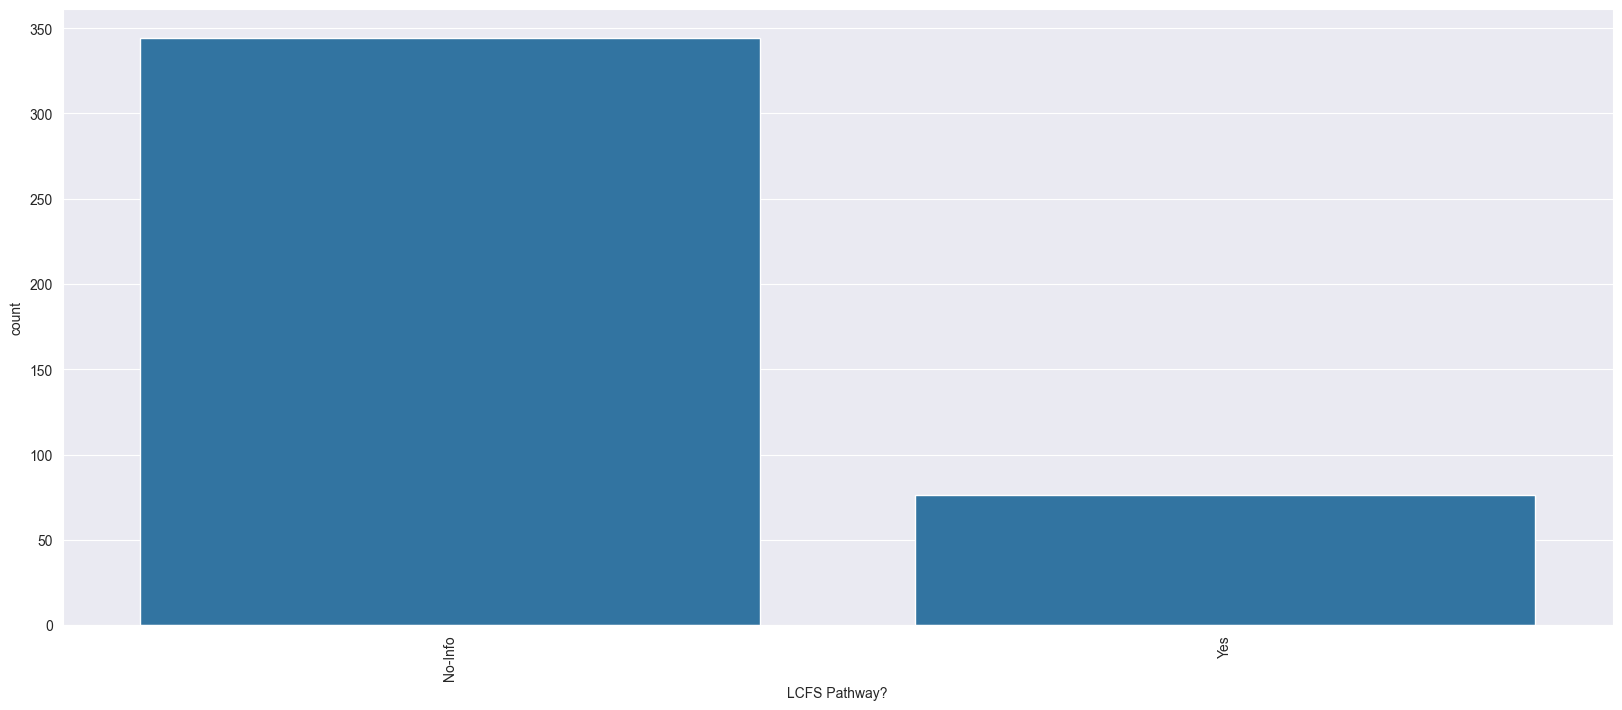

                   Receiving Utility  Ratio
Receiving Utility                          
Yes                              211 50.238
No-Info                          209 49.762
#################################################


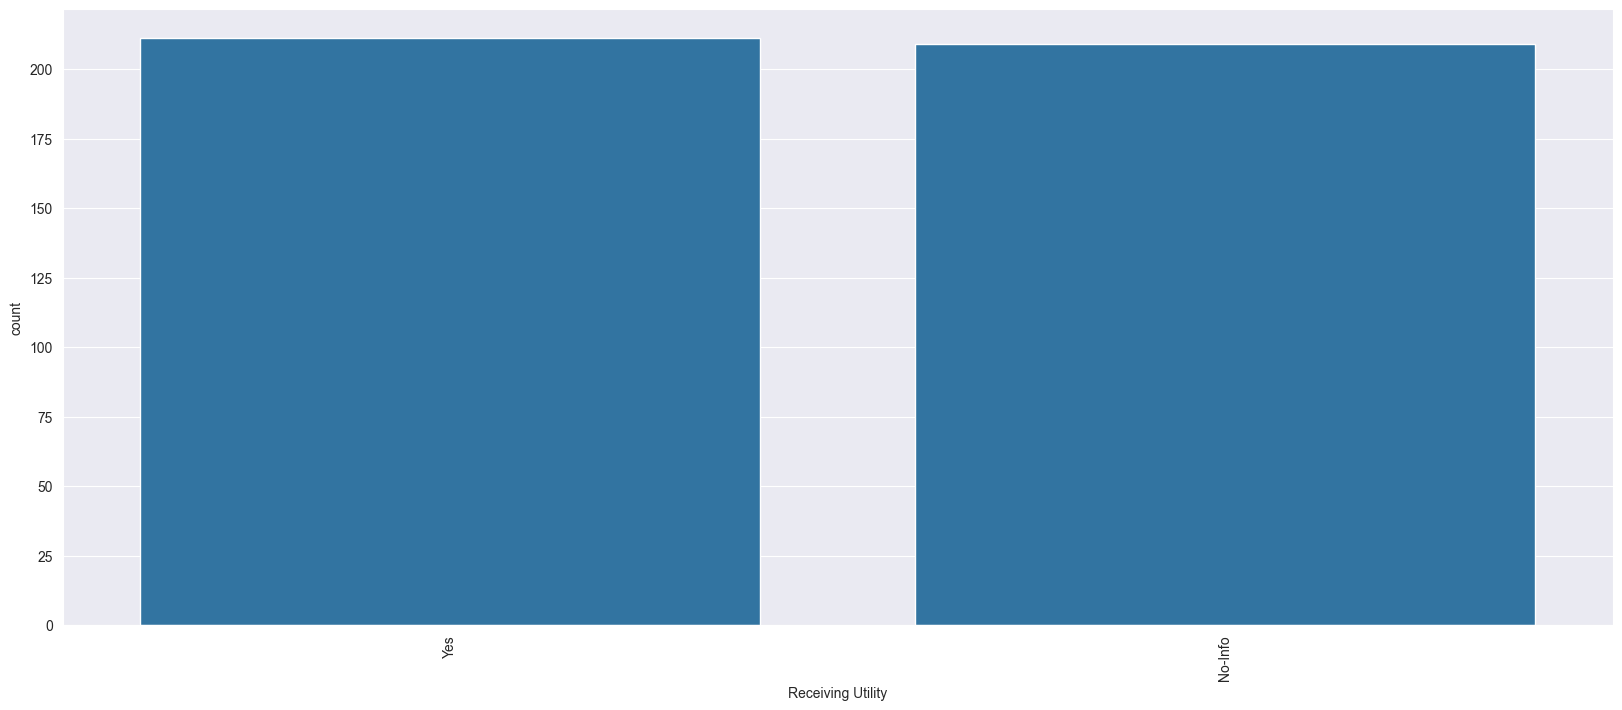

                       Awarded USDA Funding?  Ratio
Awarded USDA Funding?                              
No-Info                                  314 74.762
Yes                                      106 25.238
#################################################


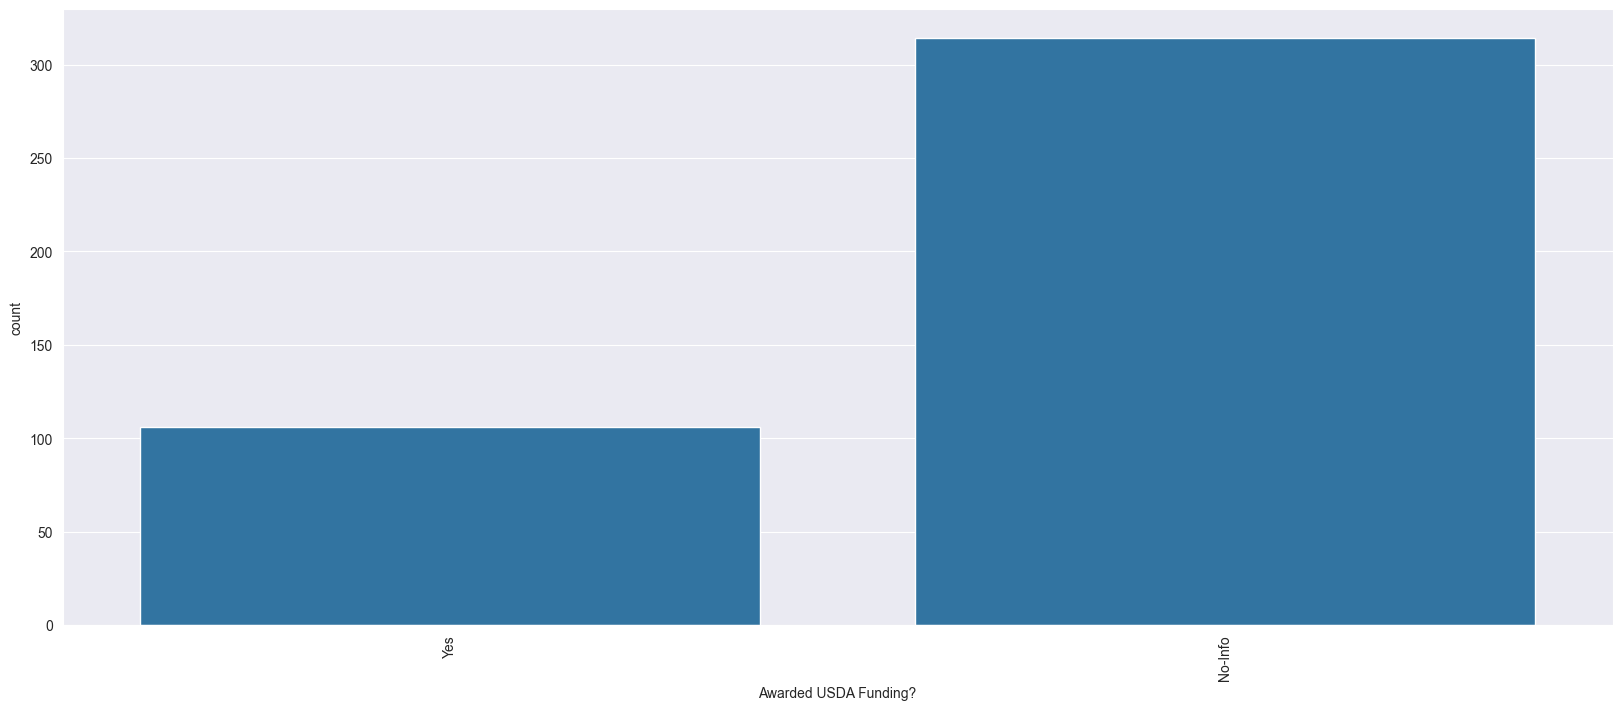

In [15]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [16]:
# analysing numerical variables

def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)

        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block = True)

count    420.000
mean    2013.490
std        8.190
min     1979.000
5%      2001.000
10%     2004.000
20%     2007.000
30%     2009.000
40%     2011.000
50%     2013.000
60%     2018.000
70%     2021.000
80%     2022.000
90%     2023.000
95%     2023.000
99%     2025.000
max     2025.000
Name: Year Operational, dtype: float64


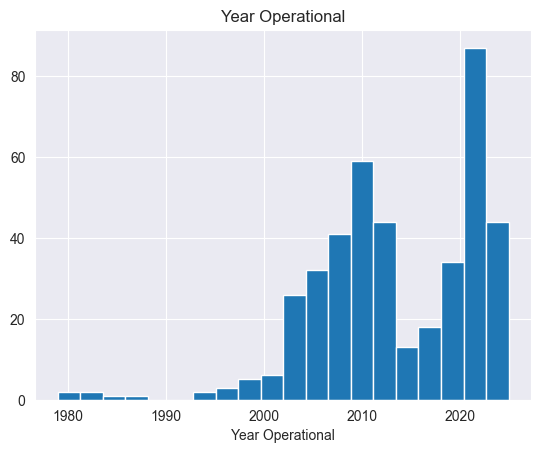

count     420.000
mean     4142.293
std      5154.917
min        30.000
5%        339.000
10%       473.000
20%       822.000
30%      1200.000
40%      1980.000
50%      2500.000
60%      3604.400
70%      5000.000
80%      6500.000
90%      8910.000
95%     10725.450
99%     32025.000
max     39000.000
Name: Dairy, dtype: float64


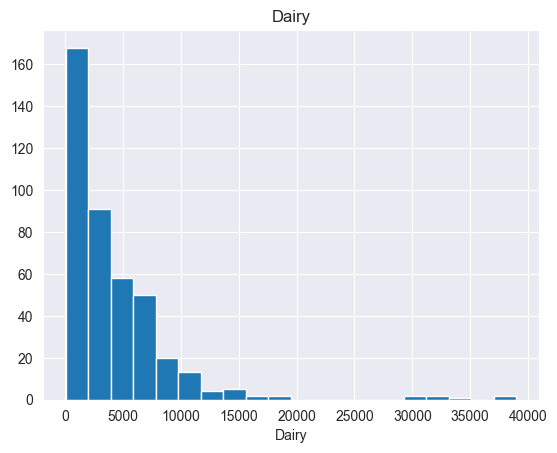

count       420.000
mean     427331.698
std      409837.441
min        5000.000
5%        35847.350
10%       55252.000
20%       94438.200
30%      117400.400
40%      229320.000
50%      325000.000
60%      405800.000
70%      635485.200
80%      710085.200
90%      907288.520
95%      957345.200
99%     1642627.200
max     3454500.000
Name: Biogas Generation Estimate (cu-ft/day), dtype: float64


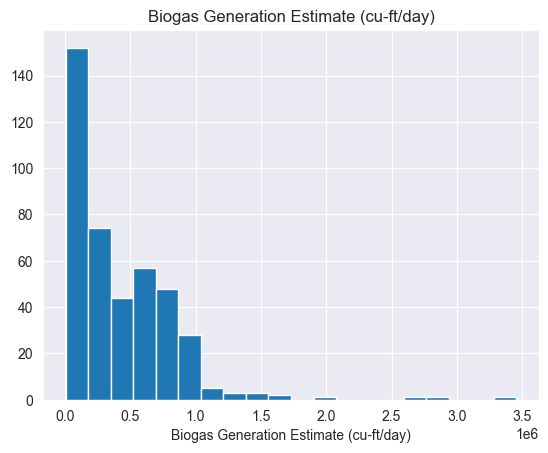

count        420.000
mean     2058721.635
std      3057433.458
min            0.000
5%             0.000
10%            0.000
20%            0.000
30%            0.000
40%       410391.600
50%       759790.200
60%      1278960.000
70%      2177684.200
80%      3587328.640
90%      6017580.000
95%      7837363.140
99%     15801083.800
max     18527400.000
Name: Electricity Generated (kWh/yr), dtype: float64


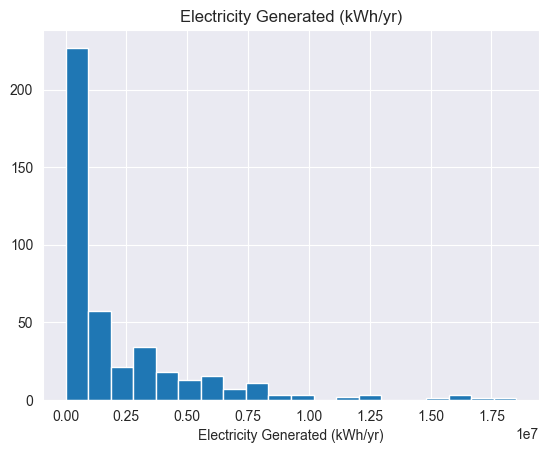

count      420.000
mean     39590.584
std      46316.663
min        157.295
5%        2670.820
10%       3409.134
20%       6603.131
30%      13156.949
40%      18659.300
50%      27008.310
60%      36127.795
70%      48268.969
80%      59098.405
90%      88099.409
95%     104588.223
99%     256049.011
max     390000.011
Name: Total Emission Reductions (MTCO2e/yr), dtype: float64


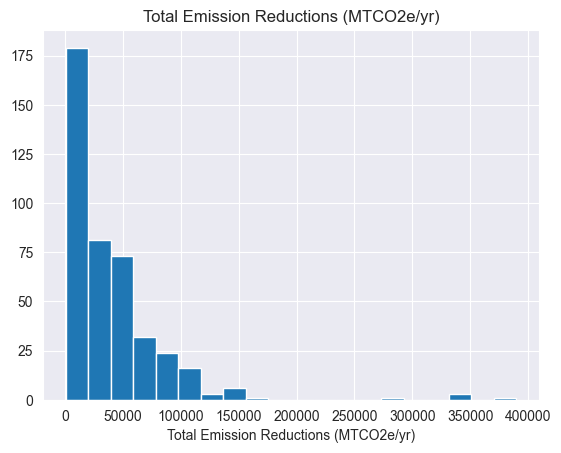

count   420.000
mean      9.581
std       8.097
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       2.000
40%       5.000
50%      10.000
60%      12.000
70%      14.000
80%      16.000
90%      19.000
95%      22.000
99%      37.810
max      44.000
Name: Operational Years, dtype: float64


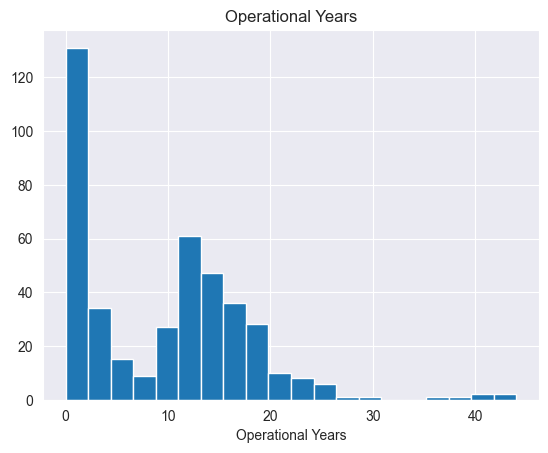

count     420.000
mean      368.799
std      1245.554
min         1.385
5%         18.033
10%        27.735
20%        50.000
30%        50.000
40%        55.963
50%        83.951
60%       110.772
70%       167.985
80%       339.603
90%       733.351
95%      1415.473
99%      4895.933
max     20287.671
Name: Biogas_per_Animal (cu-ft/day), dtype: float64


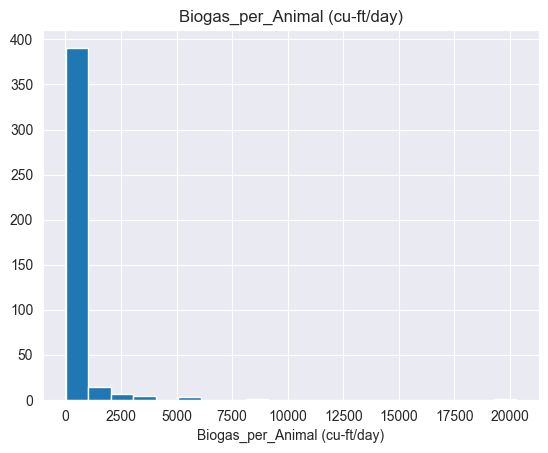

count      420.000
mean     10705.352
std      19007.005
min          0.000
5%           0.000
10%          0.000
20%        236.771
30%        565.288
40%       1009.418
50%       1870.679
60%       3250.345
70%       6714.158
80%      17310.648
90%      35566.164
95%      57795.016
99%      83383.908
max     130000.004
Name: Emission_Reduction_per_Year, dtype: float64


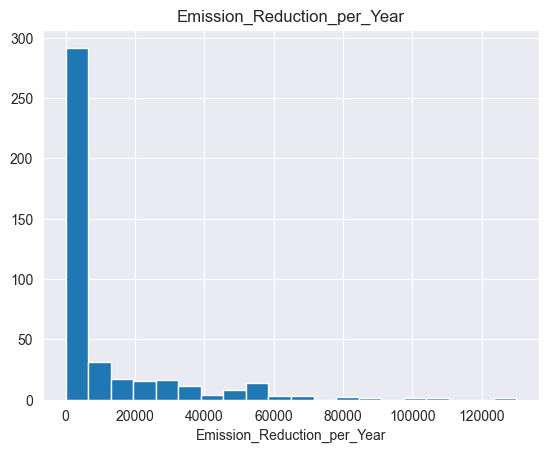

count   420.000
mean     10.387
std      19.801
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.463
50%       3.982
60%       6.907
70%      10.203
80%      14.868
90%      24.597
95%      43.904
99%      96.777
max     174.270
Name: Electricity_to_Biogas_Ratio, dtype: float64


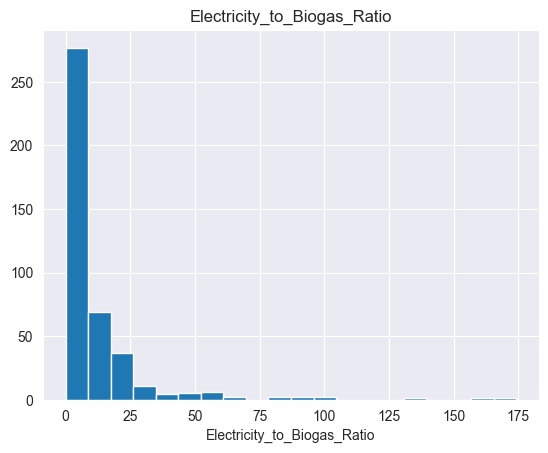

count       420.000
mean     143098.838
std      191633.460
min        1020.000
5%        11883.000
10%       17000.000
20%       28050.000
30%       41395.000
40%       68000.000
50%       85000.000
60%      122549.600
70%      170000.000
80%      221000.000
90%      302940.000
95%      364665.300
99%     1088850.000
max     2126000.000
Name: Total_Waste_kg/day, dtype: float64


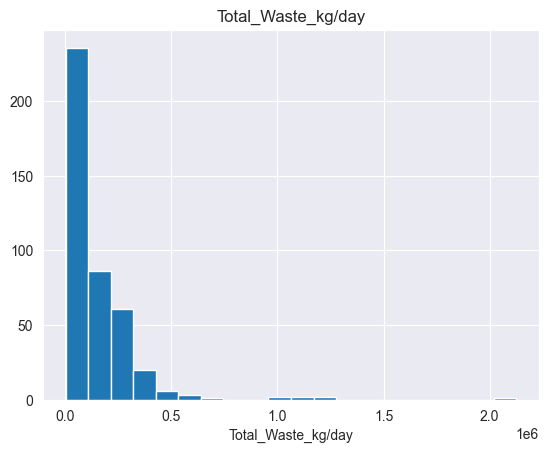

count   420.000
mean     10.893
std      36.660
min       0.043
5%        0.564
10%       0.829
20%       1.471
30%       1.471
40%       1.707
50%       2.477
60%       3.283
70%       5.001
80%       9.988
90%      21.569
95%      41.632
99%     144.795
max     596.696
Name: Waste_Efficiency, dtype: float64


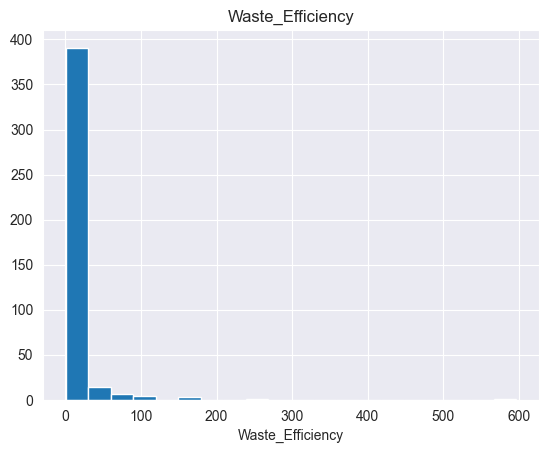

count    420.000
mean      36.862
std       80.111
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        6.510
50%       18.050
60%       25.962
70%       38.977
80%       52.282
90%       77.334
95%      121.555
99%      362.938
max     1150.824
Name: Electricity_Efficiency, dtype: float64


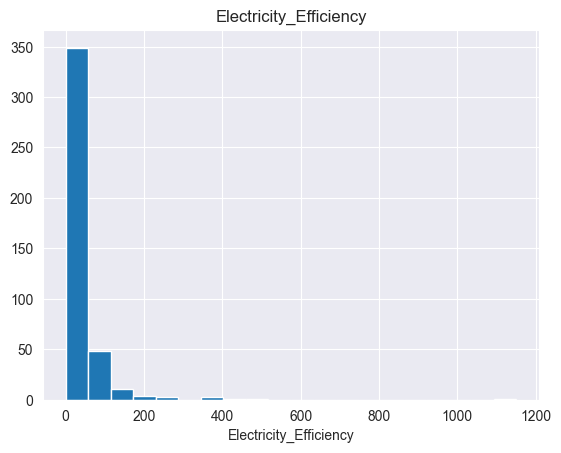

In [17]:
for col in num_cols:
    num_summary(df, col, plot = True)

In [18]:
# analysis of categorical variables by target
def target_summary_with_num(dataframe, target, numerical_col, plot = False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)



In [19]:
for col in num_cols:
    target_summary_with_num(df, 'Biogas Generation Estimate (cu-ft/day)', col,  plot = False)

                                        Year Operational_mean
Biogas Generation Estimate (cu-ft/day)                       
5000.000                                             2008.000
12000.000                                            2007.000
13000.000                                            1994.000
14000.000                                            1997.500
14832.000                                            2004.000
...                                                       ...
1657485.200                                          2004.000
2000000.000                                          2019.000
2739726.000                                          2008.000
2908000.000                                          2006.000
3454500.000                                          2018.000

[273 rows x 1 columns]


                                        Dairy_mean
Biogas Generation Estimate (cu-ft/day)            
5000.000                                   140.000
12000.000      

In [20]:
# lets analyze correlation
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr(numeric_only=True)
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize':(16, 14)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
        plt.show()
    return drop_list

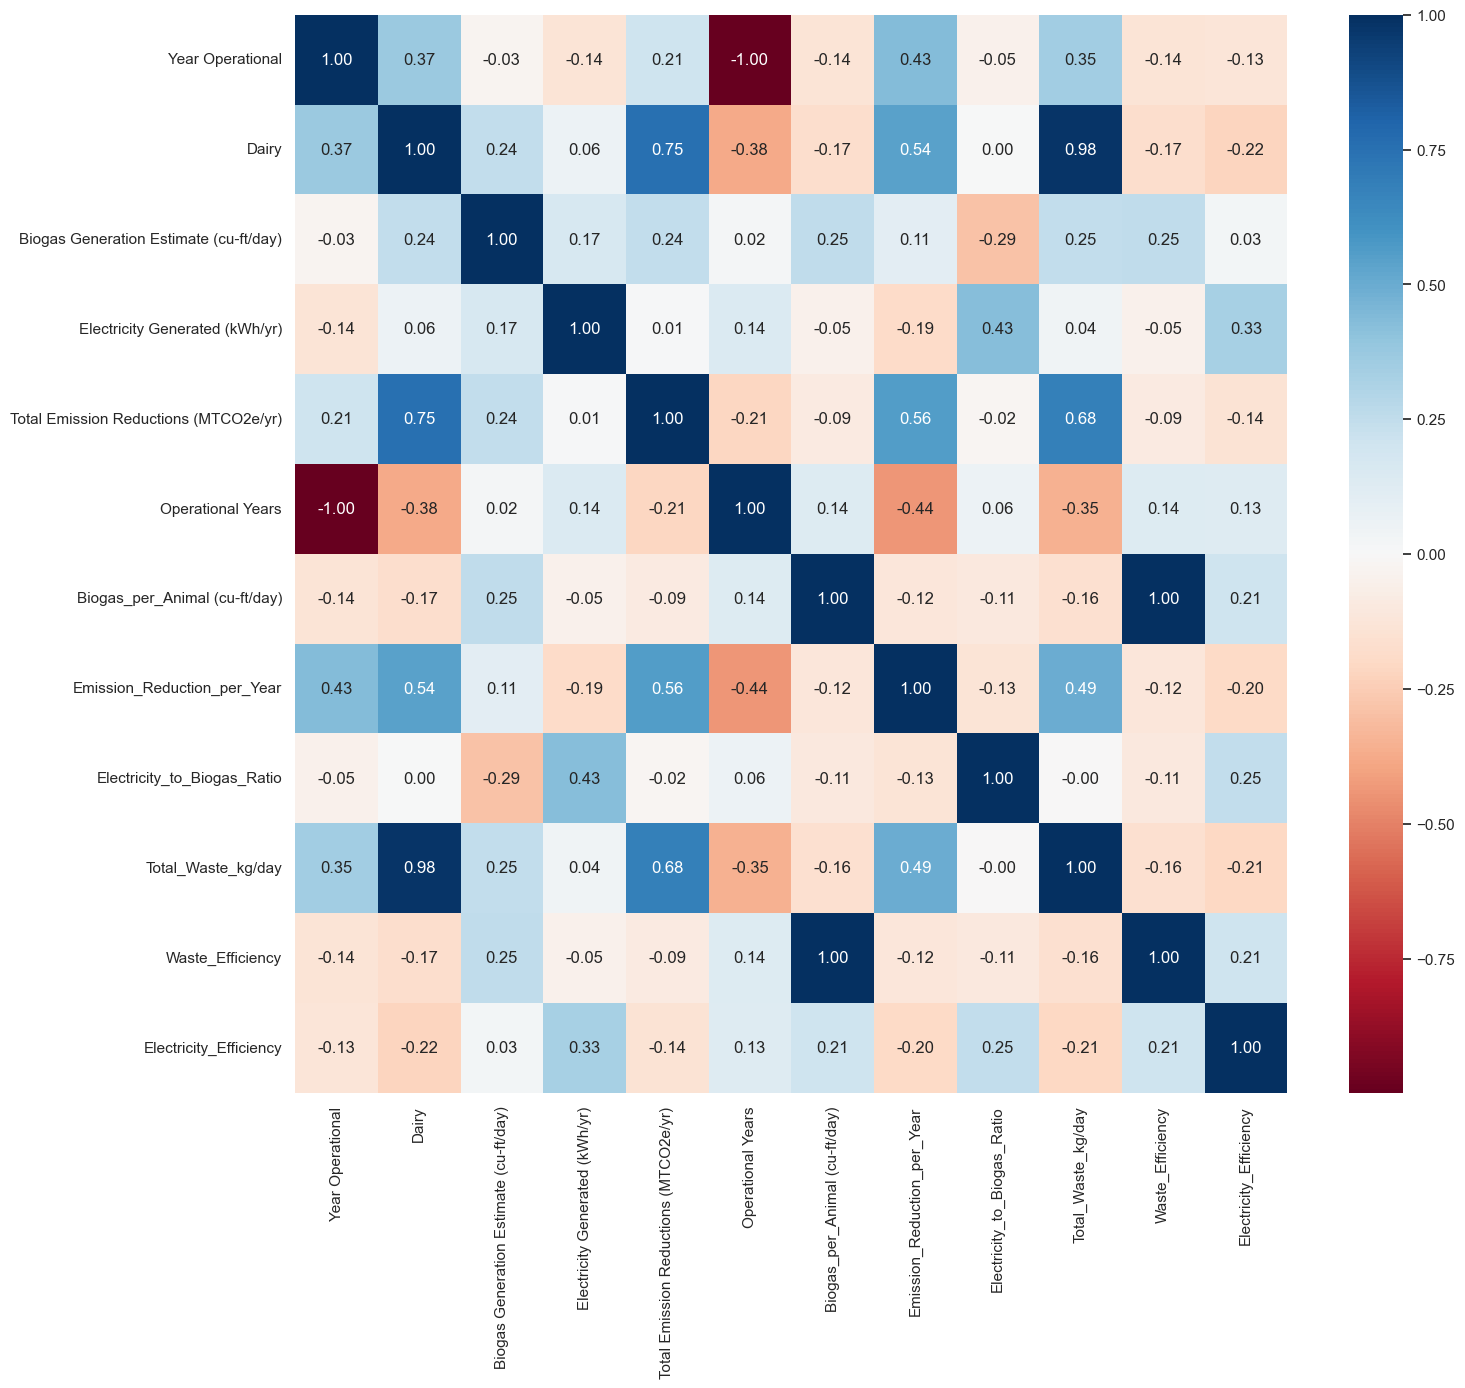

['Total Emission Reductions (MTCO2e/yr)',
 'Operational Years',
 'Total_Waste_kg/day',
 'Waste_Efficiency']

In [21]:
high_correlated_cols(df, plot=True)

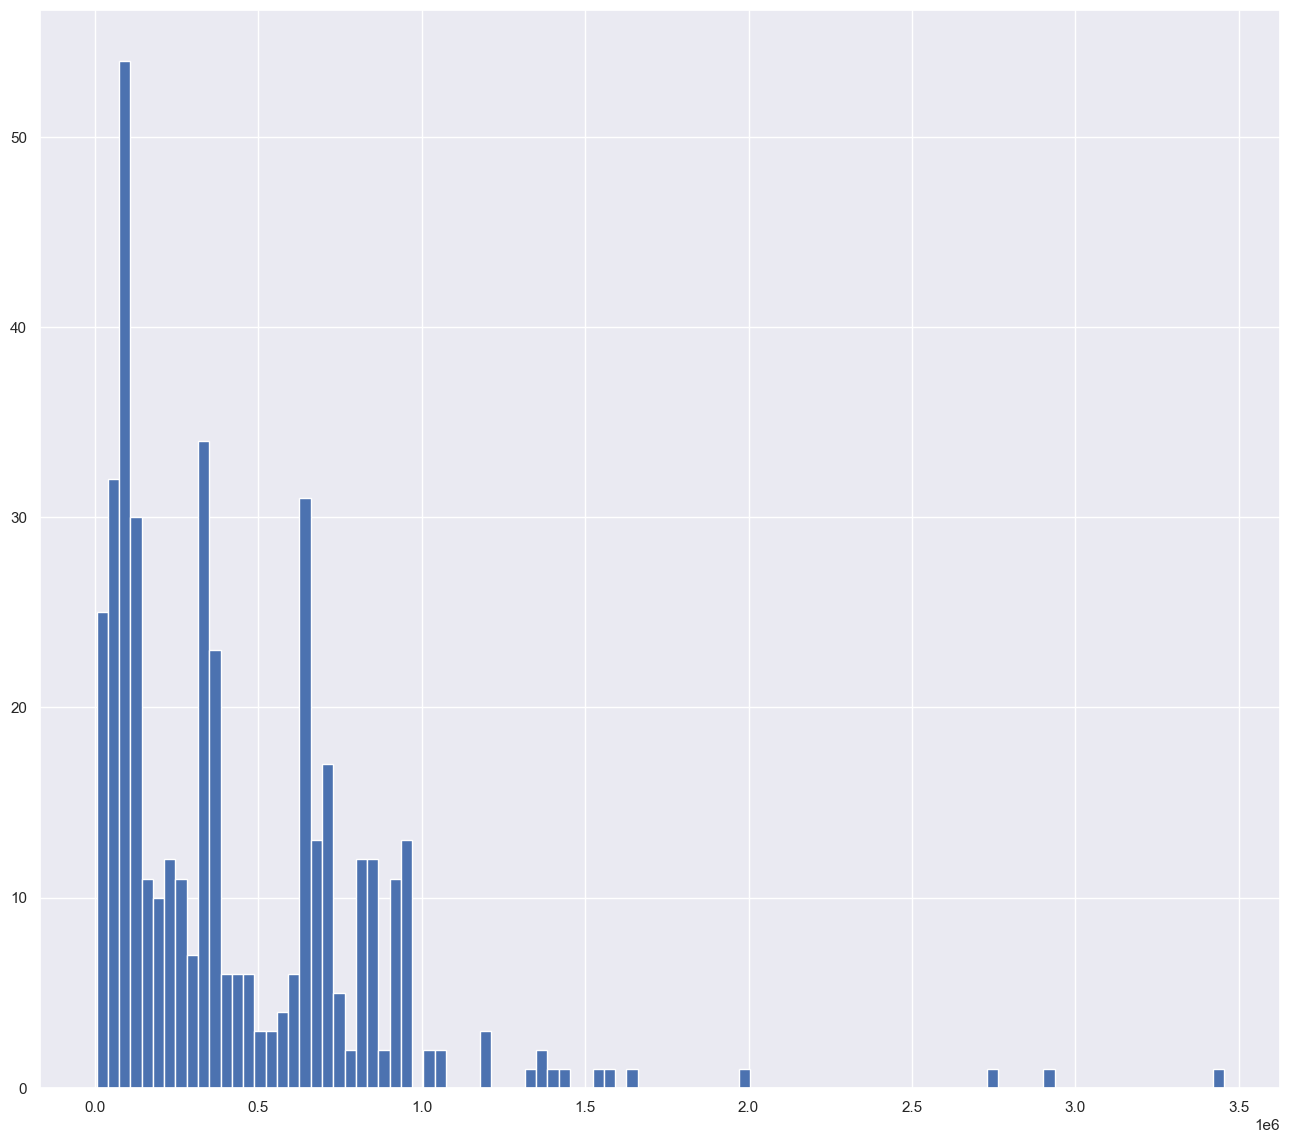

In [22]:
# plotting distribution of dependent variable
df["Biogas Generation Estimate (cu-ft/day)"].hist(bins=100)
plt.show(block=True)

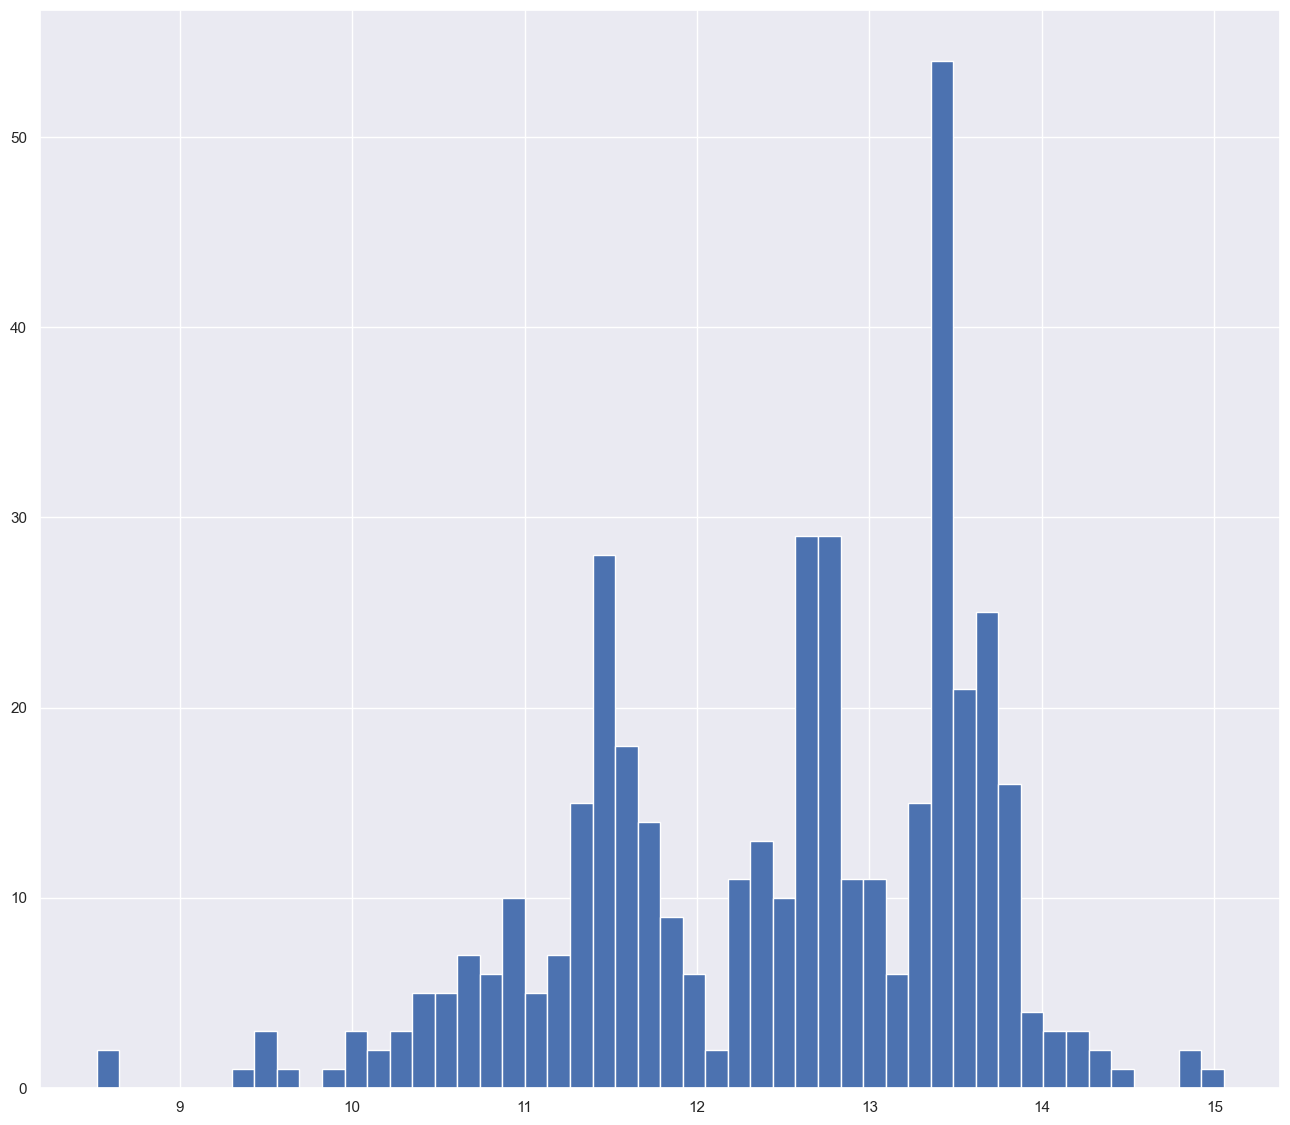

In [23]:
# Lets examine the log of the Dependent Variable
np.log1p(df['Biogas Generation Estimate (cu-ft/day)']).hist(bins=50)
plt.show(block=True)

In [24]:
# Outlier analysis
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [26]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [27]:
for col in num_cols:
    print(col, check_outlier(df, col))

Year Operational True
Dairy True
Biogas Generation Estimate (cu-ft/day) True
Electricity Generated (kWh/yr) True
Total Emission Reductions (MTCO2e/yr) True
Operational Years True
Biogas_per_Animal (cu-ft/day) True
Emission_Reduction_per_Year True
Electricity_to_Biogas_Ratio True
Total_Waste_kg/day True
Waste_Efficiency True
Electricity_Efficiency True


In [29]:
# replace outlier with threshold value
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [30]:
for col in num_cols:
    print(col, check_outlier(df, col))

Year Operational False
Dairy False
Biogas Generation Estimate (cu-ft/day) False
Electricity Generated (kWh/yr) False
Total Emission Reductions (MTCO2e/yr) False
Operational Years False
Biogas_per_Animal (cu-ft/day) False
Emission_Reduction_per_Year False
Electricity_to_Biogas_Ratio False
Total_Waste_kg/day False
Waste_Efficiency False
Electricity_Efficiency False


In [ ]:
# Analyzing missing values
